In [76]:
%matplotlib inline
import pandas as pd
import missingno as msno
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import graphviz

In [36]:
colunas = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
           'serum_cholestoral', 'fasting_blood_sugar', 'restecg', 'max_hrate',
           'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
full_data = pd.read_csv("src/processed.cleveland.data.csv", names=colunas, na_values=["?"])
full_data.head(15)

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,restecg,max_hrate,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


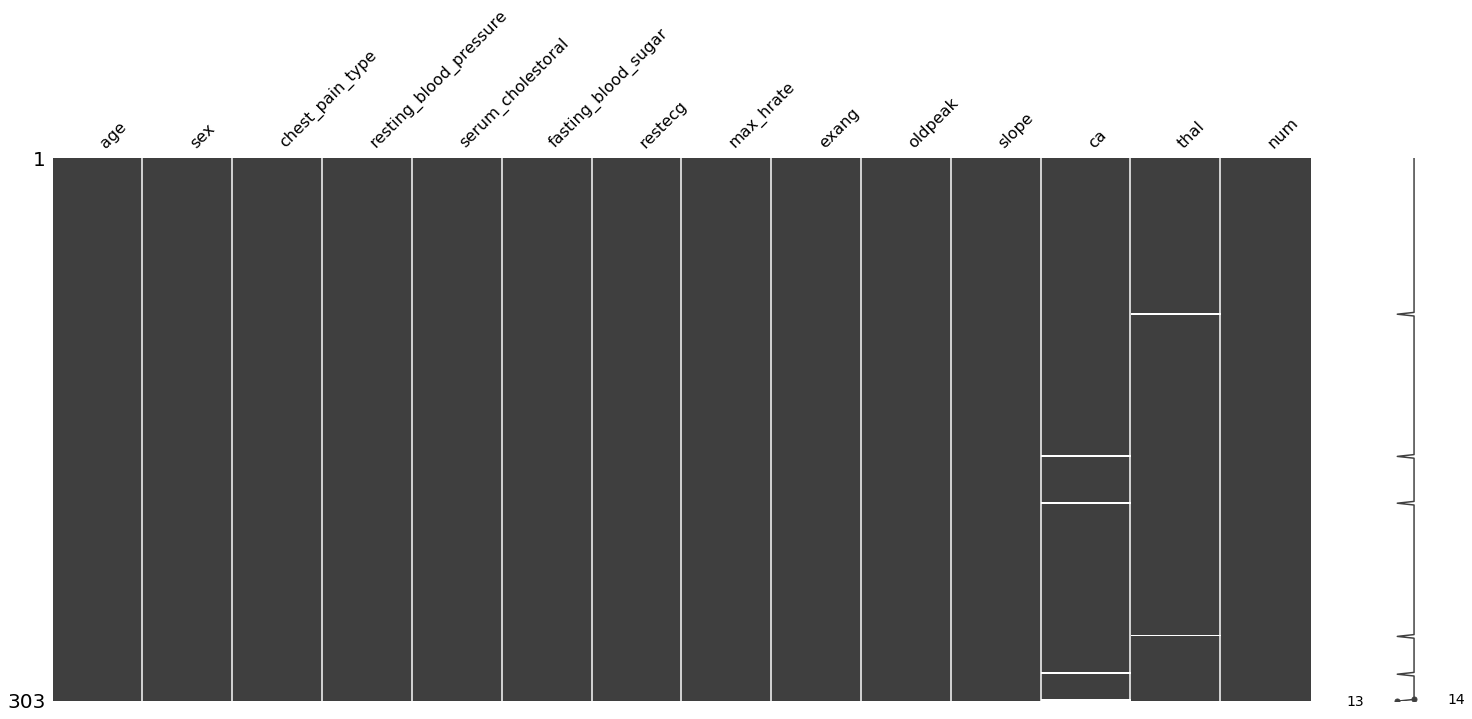

In [40]:
# Visualizar a distribuição de valores vazios no conjunto de dados
msno.matrix(full_data)

In [38]:
# Quantidade de dados faltantes no conjunto
full_data.isnull().sum()

age                       0
sex                       0
chest_pain_type           0
resting_blood_pressure    0
serum_cholestoral         0
fasting_blood_sugar       0
restecg                   0
max_hrate                 0
exang                     0
oldpeak                   0
slope                     0
ca                        4
thal                      2
num                       0
dtype: int64

In [45]:
# Estratégia pra lidar com dados faltantes: dispensar a linha inteira (são poucas linhas)
data = full_data.dropna()

In [72]:
X = data[colunas[:-1]]
Y = data[colunas[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [74]:
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.51515151515151514

In [80]:
dot_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(dot_data)  
graph.render('model')

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'model'], make sure the Graphviz executables are on your systems' PATH

In [83]:
X_train

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,restecg,max_hrate,exang,oldpeak,slope,ca,thal
186,42.0,1.0,3.0,120.0,240.0,1.0,0.0,194.0,0.0,0.8,3.0,0.0,7.0
294,63.0,0.0,4.0,124.0,197.0,0.0,0.0,136.0,1.0,0.0,2.0,0.0,3.0
250,57.0,1.0,4.0,110.0,201.0,0.0,0.0,126.0,1.0,1.5,2.0,0.0,6.0
113,43.0,0.0,4.0,132.0,341.0,1.0,2.0,136.0,1.0,3.0,2.0,0.0,7.0
100,45.0,1.0,4.0,115.0,260.0,0.0,2.0,185.0,0.0,0.0,1.0,0.0,3.0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0
226,47.0,1.0,4.0,112.0,204.0,0.0,0.0,143.0,0.0,0.1,1.0,0.0,3.0
290,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0
256,67.0,0.0,4.0,106.0,223.0,0.0,0.0,142.0,0.0,0.3,1.0,2.0,3.0
31,60.0,1.0,4.0,117.0,230.0,1.0,0.0,160.0,1.0,1.4,1.0,2.0,7.0
